# Chapter 8 - Dimensionality Reduction

## Discussion

### Curse of dimensionality

TODO: This is a good opportunity to create some nice visualisations

## Principal Component Analysis

Principal Component Analysis (PCA) is a technique for identifying the lower-dimensional hyperplane that lies closest to the data, then projecting the data onto it.

### Create a random 3D dataset

In [22]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### PCA using Scikit-Learn

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

We can recover an approximation of the original 3D points using the inverse transform:

In [25]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there will be some loss:

In [26]:
np.allclose(X3D_inv, X)

False

### Visualise the dataset

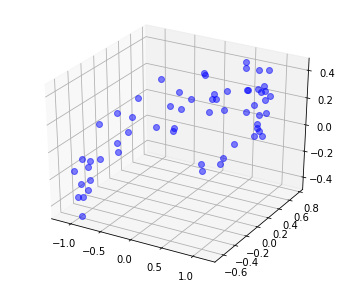

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo", alpha=0.5)
plt.show()

We can also plot this in 2D:

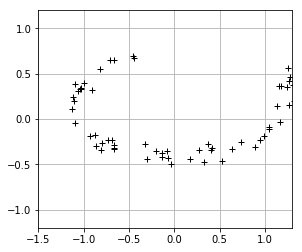

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], 'k+')
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

## Manifold Learning

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie. Manifold Learning techniques rely on the assumption that most real-world high-dimensional dataset actually lie close to a much lower-dimensional manifold.

MNIST is a good example of this. Even distinct digits share are number of commonalities that do not change between training examples. For example, white borders, large consistent strokes. Another way of looking at this is that, if you were to generate random images with same dimensionality as the MNIST dataset, only a tiny fraction of them would look like digits.

### Swiss roll dataset

A simple dataset that we can use to understand Manifold learning is the _Swiss roll_ toy dataset. This is a three-dimensional dataset that demonstrates how projection into a lower-dimensional subspace may not be sufficient.

We can generate the dataset using `make_swiss_roll` from scikit-learn:

In [65]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

We can then visualise it using a 3d plot:

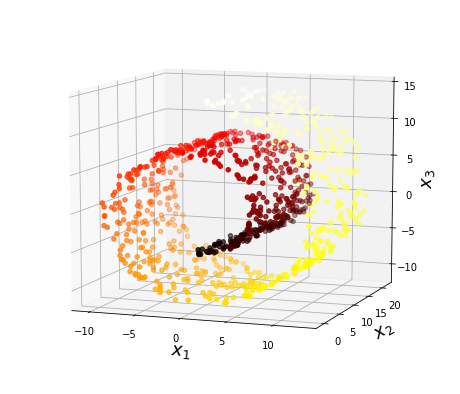

In [66]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

We can use the following projections to see why projection is not sufficient:

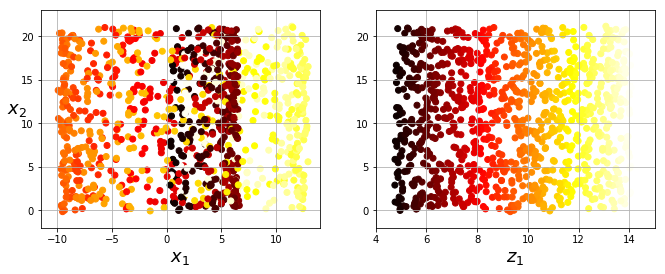

In [60]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

Simply projecting the points onto a plane will squash the different layers of the Swiss roll together, as demonstrated by the plot on the left. We are left with several regions where target values overlap, and would be impossible to accurately predict without over-fitting the training data.

Instead, what we want is unroll the dataset, to find a mapping that is closer to the plot on the right. i.e. we want to find a function that more closely maps the training examples to lower-dimensional manifold that they lie on / close to.

We can do this with a Locally Linear Embedding (LLE):

### Locally Linear Embedding

The way this algorithm works, is that for each training instance $x^{(i)}$, it identifies the $k$ nearest neighbours, then tries to reconstruct $x^{(i)}$ as a function of those neighbours. Specifically, it tries to find weights $w_{i,j}$ such that the squared distance between $x^{(i)}$ and $\sum_{j=1}^{m} w_{i,j}x^{(j)}$ is as small as possible.

Using scikit-learn, we can fit a Locally Linear Embedding:

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

Plotting this shows that we have successfully mapped the training data onto a lower-dimensional manifold:

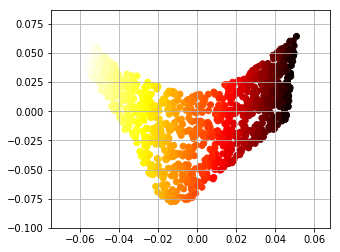

In [62]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()

## Other techniques

### Multidimensional scaling

Multidimensional scaling (MDS) reduces dimensionality while trying to preserve distances between instances:

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

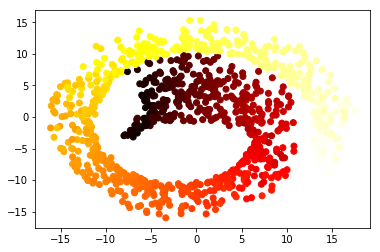

In [70]:
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=t, cmap=plt.cm.hot)

### Isomap

Isomap creates a graph by connecting each instance to its nearest neighbours, then reduces dimensionality while trying to preserve the geodesic distances between the instances:

In [71]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

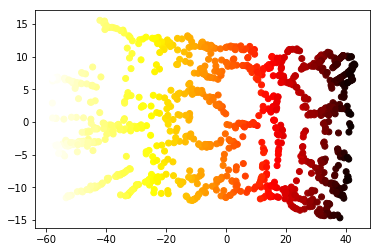

In [76]:
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=t, cmap=plt.cm.hot)
plt.show()

### t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

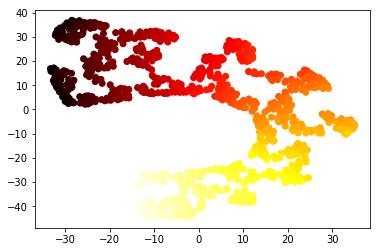

In [77]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.show()